In [ ]:
businesses_df

In [2]:
pwd

'/home/jovyan/work/DSI/yelp/Yelp-Reviews/notebooks'

In [3]:
cd ..

/home/jovyan/work/DSI/yelp/Yelp-Reviews


In [4]:
cd src/

/home/jovyan/work/DSI/yelp/Yelp-Reviews/src


In [5]:
run clean_data.py

In [ ]:
businesses_df

In [9]:
business_df_flat_subset.printSchema()

root
 |-- address: string (nullable = true)
 |-- AcceptsInsurance: string (nullable = true)
 |-- AgesAllowed: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Ambience: string (nullable = true)
 |-- BYOB: string (nullable = true)
 |-- BYOBCorkage: string (nullable = true)
 |-- BestNights: string (nullable = true)
 |-- BikeParking: string (nullable = true)
 |-- BusinessAcceptsBitcoin: string (nullable = true)
 |-- BusinessAcceptsCreditCards: string (nullable = true)
 |-- BusinessParking: string (nullable = true)
 |-- ByAppointmentOnly: string (nullable = true)
 |-- Caters: string (nullable = true)
 |-- CoatCheck: string (nullable = true)
 |-- Corkage: string (nullable = true)
 |-- DietaryRestrictions: string (nullable = true)
 |-- DogsAllowed: string (nullable = true)
 |-- DriveThru: string (nullable = true)
 |-- GoodForDancing: string (nullable = true)
 |-- GoodForKids: string (nullable = true)
 |-- GoodForMeal: string (nullable = true)
 |-- HairSpecializesIn: strin

In [ ]:
import business_df as bd

In [ ]:
businesses_df.plot_hist('stars', 'DogsAllowed')

In [ ]:
type(businesses)

In [ ]:
import business_df as bd
businesses_df = bd.BusinessDF(businesses)

In [ ]:
ax = businesses_df['stars'].hist(bins=9)
ax.set_title('Average Star Rating: Distribution for All Businesses')
ax.set_xlabel('avg. stars')
ax.set_ylabel('count of businesses')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

In [ ]:
ax = businesses_df['stars'].hist(bins=8)
ax.set_title('Average Star Rating: Distribution for All Businesses')
ax.set_xlabel('avg. stars')
ax.set_ylabel('count of businesses')

fig = ax.figure
fig.set_size_inches(8, 5)
fig.tight_layout(pad=1)
fig.savefig('../images/Overall_stars_hist.png')

In [ ]:
cutoff = 2000
data = businesses_df[businesses_df['review_count'] < cutoff]['review_count']
ax = data.plot.hist(bins=20)
ax.set_title('Review Counts: All Businesses')
ax.set_xlabel('review count')
ax.set_ylabel('count of businesses')
ax.set_xlim(0, cutoff)

fig = ax.figure
fig.set_size_inches(8, 5)
fig.tight_layout(pad=1)
fig.savefig('../images/Overall_reviewCounts_hist.png')

In [ ]:
ax = businesses_df['DogsAllowed'].hist()
ax.set_title('DogsAllowed')
ax.set_ylabel('count of businesses')

fig = ax.figure
fig.set_size_inches(8, 5)
fig.tight_layout(pad=1)
# fig.savefig('../images/Overall_stars_hist.png')

In [ ]:
businesses_df['Restaurant'] = businesses_df['categories'].str.contains(pat='Restaurant')

In [ ]:
businesses_df['Restaurant'].value_counts()

In [ ]:
import business_df as bd

In [ ]:
businesses_df.plot_hist('stars', 'DogsAllowed')

In [ ]:
businesses_df = bd.BusinessDF(businesses)

In [5]:
cd ../src

/home/jovyan/work/DSI/yelp/Yelp-Reviews/src


In [ ]:
run clean_data.py

In [ ]:
type(businesses_df)

In [ ]:
type(businesses)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
from importlib import reload

import business_df as ydf
reload(ydf)
from business_df import *

#businesses_df = ydf.YelpDF(businesses)
#businesses_df['Restaurant'] = businesses_df['categories'].str.contains(pat='Restaurant')
#businesses_df = pd.read_pickle('../data/pickled_businesses_df')

In [ ]:
businesses_df['Restaurant'].value_counts()

In [ ]:
businesses_df.plot_value_counts_bar('categories', filter_by=('Restaurant', [False]))

In [ ]:
businesses_df.plot_stars_hist('city', limit=5, save=True)

In [ ]:
businesses_df.plot_review_counts_hist('city', limit=5, cutoff=1000, save=True)

In [ ]:
restaurants = businesses_df[businesses_df['Restaurant']==True]
restaurants = bd.BusinessDF(restaurants)

In [ ]:
businesses_df.plot_stars_hist('DogsAllowed', limit=3)

In [ ]:
fig, ax = plt.subplots()
data = businesses_df[businesses_df['review_count']<5000]
x = data['stars']
y = data['review_count']
ax.scatter(x, y)
ax.set_xlabel('avg star rating')
ax.set_ylabel('number of reviews')
title = 'Avg. Star Rating vs. Number of Reviews'
ax.set_title(title)
fig.savefig(f'../images/{title}.png')

In [ ]:
where = ('DogsAllowed', ['True'])
col, val = where
dogs = businesses_df[businesses_df[col].isin(val)]

In [ ]:
dogs.shape

In [ ]:
businesses_df.plot_value_counts_bar('city', filter_by=('Restaurant', [True]))

In [ ]:
businesses_df.to_pickle('../data/pickled_businesses_df')

In [ ]:
businesses_test_df = pd.read_pickle('../data/pickled_businesses_df')

In [ ]:
type(businesses_test_df)

In [ ]:
col_name = 'city'
col, vals = ('BusinessAcceptsBitcoin', ['True'])
filtered = businesses_df[businesses_df[col].isin(vals)]
legend_label = f'count of businesses where {col} is in {vals}'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data = filtered[col_name].value_counts()[0:10]
labels = data.index
N = len(labels)
tick_locations = np.arange(N)

restaurant_counts = []
non_restaurant_counts = []

for lab in labels:
    restaurant_data = filtered[(filtered['Restaurant']==True) & (filtered[col_name]==lab)]
    non_restaurant_data = filtered[(filtered['Restaurant']==False) & (filtered[col_name]==lab)]
    restaurant_counts.append(len(restaurant_data))
    non_restaurant_counts.append(len(non_restaurant_data))
        
ax.barh(tick_locations, restaurant_counts, label='Restaurants')
ax.barh(tick_locations, non_restaurant_counts, label='Not Restaurants', left=restaurant_counts)
ax.set_yticks(ticks=tick_locations)
ax.set_yticklabels(labels)
ax.set_xticks(np.arange(0, max(restaurant_counts) + max(non_restaurant_counts) + 1, step=5))
ax.set_xlabel('number of businesses')
ax.set_ylabel(f'{col_name}')
title = f'Businesses that Accept Bitcoin by {col_name}'
ax.set_title(title)
ax.legend()
plt.gca().invert_yaxis()
fig.savefig(f'../images/{title}.png')

In [ ]:
restaurant_data = filtered[(filtered['Restaurant']==True) & (filtered['city']=='Las Vegas')]

In [ ]:
max(restaurant_counts) + max(non_restaurant_counts)

In [ ]:
import pyspark as ps
import json as js
import pyspark.sql.functions as F
from pyspark.sql.types import *
import pandas as pd

spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName('new_app') 
        .getOrCreate()
        )
sc = spark.sparkContext
business_df = spark.read.json('../../data/yelp_dataset/business.json')

In [ ]:
def flatten_df(nested_df):
    '''
    Flatten a nested dataframe where some columns are nested structures.

    Parameters:
        nested_df (spark dataframe): Dataframe with nested columns

    Returns:
        flat_df (spark dataframe): Dataframe that includes a column for each element under a nested structure
    '''

    new_col_names = []
    columns = nested_df.dtypes
    for col in columns:
        col_name = col[0]
        col_type = col[1].strip('>').split('<')  # If the column type is a structure, we want to split it into the 'struct' then the underlying schema
        if col_type[0] == 'struct':  # If the column type is a structure
            nested_cols = col_type[1].split(',')
            nested_col_names = [col.split(':')[0] for col in nested_cols]
            nested_col_refs = ['.'.join([col_name, name]) for name in nested_col_names]
            new_col_names.extend(nested_col_refs)
        else:
            new_col_names.append(col_name)

    flat_df = nested_df.select(new_col_names)
    return flat_df

In [ ]:
business_df_flat = flatten_df(business_df)

In [ ]:
def subset_businesses(df, n=100):
    ''' Subset the businesses dataframe to only businesses with at least n reviews.'''
    
    subset_df = df.filter(df.review_count >= n)
    return subset_df

In [ ]:
business_df_flat_subset = subset_businesses(business_df_flat, 100)

In [ ]:
business_df_flat_subset.createOrReplaceTempView('business_df_flat_subset')

In [ ]:
df = business_df_flat_subset
col_name = 'categories'

df = df.select(df[col_name].alias('string_col'))
df.createOrReplaceTempView('df')
df_lists = spark.sql('''
                      SELECT split(lower(string_col), ',') as lst_col
                      FROM df
''')

df_lists.createOrReplaceTempView('df_lists')

elements = spark.sql('''
                    SELECT trim(elem) as elem
                    FROM df_lists
                        LATERAL VIEW explode(lst_col) as elem
''')

counts_df = elements.groupBy(elements[0]).count().orderBy('count', ascending=False)

In [ ]:
counts_df.show(5)

In [ ]:
cd ../src

In [ ]:
run clean_data.py

In [ ]:
result = spark.sql('SELECT *, length(elem) FROM counts_df')

In [ ]:
result.show(5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

In [ ]:
fig, ax = plt.subplots()
x = category_counts['elem'][0:10]
y = category_counts['count'][0:10]
ax.barh(x, y)
ax.set_title('Top 10 business categories')
plt.gca().invert_yaxis()
fig.savefig('../images/Top 10 business categories.png')

In [ ]:
user_df = read_json_to_df('../../data/yelp_dataset/user.json')

In [ ]:
def subset_users(user_df, n=50):
    ''' Subset the users df to only users with at least n reviews.'''

    subset_df = user_df.filter(user_df.review_count >= n)
    return subset_df

In [ ]:
user_df_subset = subset_users(user_df, 200)

In [ ]:
user_df_subset.count()

In [10]:
run clean_data.py

In [12]:
type(users_df)

business_df.YelpDF

In [6]:
import business_df as ydf

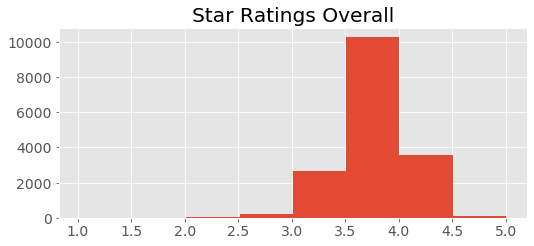

In [17]:
users_df.plot_stars_hist()

In [11]:
run yelp_plots.py

No handles with labels found to put in legend.


In [42]:
users_df = ydf.YelpDF(users, 'average_stars', 'review_count')

In [32]:
users_df.to_pickle('../data/pickled_user_df')

In [18]:
business_df_flat_subset.printSchema()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:40613)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:40613)

In [9]:
user_df.printSchema()

AttributeError: 'YelpDF' object has no attribute 'printSchema'

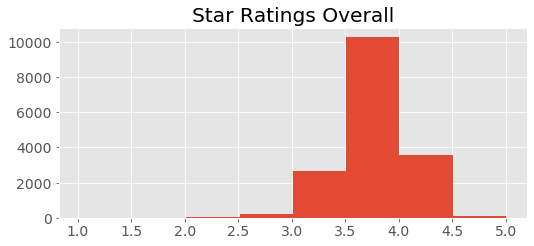

In [54]:
users_df.plot_review

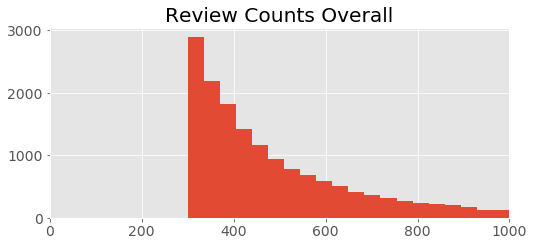

In [52]:
cutoff = 1000
cutoff_data = users_df[users_df[users_df.review_count_col] < cutoff]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
review_count_data = cutoff_data[users_df.review_count_col]
ax.hist(review_count_data, bins=20)
ax.set_xlim(0, cutoff)
title = 'Review Counts Overall'
ax.set_title(title)

plt.tight_layout(pad=2)